## Conclusion

> #### 1) The age group 30 to 34 are more likely to be converted than the age group 35 to 39 and the age group 45 to 49; about the same as 40 to 44.
> #### 2) The conversion rates for male and female audience are likely to be the same raate.
> #### 3) Ads Performance Metrics
>> * As for click-through rate, all three campaigns are likely to have the same.
>> * As for revenue per 1,000 impressions rate, the ads campaign 1178 is likely to have the highest rate.
>> * As for revenue per click rate, the ads campaign 1178 is likely to be have the highest rate.


### The Best Target Audience: the age froup 30-35, 40-44
### The Most Revenue Generating Ads: the campaign 1178

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -Uqq pingouin
import pingouin
from scipy.stats import t

In [3]:
# load marketing data
marketing = pd.read_csv('../input/clicks-conversion-tracking/KAG_conversion_data.csv')
marketing.sample(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
922,1121944,1178,144681,35-39,F,24,109723,27,40.960000,1,0
688,1121415,1178,144593,35-39,M,65,113501,26,38.440001,5,4
995,1122193,1178,144722,45-49,F,10,1358324,346,465.079998,8,2
510,951853,936,123736,30-34,F,20,529,0,0.000000,0,0
493,951464,936,123671,45-49,F,16,20997,10,11.950000,1,0


In [4]:
# view statistics
marketing.describe(include = 'all')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


#### Considering the difference betwee max value and mean, it appears some rows have outliers. 

In [5]:
# check the number of missing data and data type by columns
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


#### There are no missing values and all columns have appropriate data type.

## Exploratory Data Analysis

### 1. How many advertisements does this data have? 

In [6]:
marketing['ad_id'].nunique()

1143

In [7]:
marketing['xyz_campaign_id'].nunique()

3

In [8]:
marketing['fb_campaign_id'].nunique()

691

#### The column, 'ad_id' has all unique ids while 'xyz_campaign_id' and 'fb_compaign_id' have 3, 691 unique ids. 

### 2.How many impressions/clicks/sales did each ad campaigns generate?

In [9]:
xyz_imp = marketing.groupby('xyz_campaign_id', as_index = False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum'})
xyz_imp

,xyz_campaign_id,Impressions,Clicks,Spent
0,916,482925,113,149.710001
1,936,8128187,1984,2893.369999
2,1178,204823716,36068,55662.149959


In [10]:
melt = pd.melt(xyz_imp, id_vars = ['xyz_campaign_id'], value_vars = ['Impressions', 'Clicks', 'Spent'], var_name = 'result', value_name = 'total')
melt

,xyz_campaign_id,result,total
0,916,Impressions,4.829250e+05
1,936,Impressions,8.128187e+06
2,1178,Impressions,2.048237e+08
3,916,Clicks,1.130000e+02
4,936,Clicks,1.984000e+03
5,1178,Clicks,3.606800e+04
6,916,Spent,1.497100e+02
7,936,Spent,2.893370e+03
8,1178,Spent,5.566215e+04


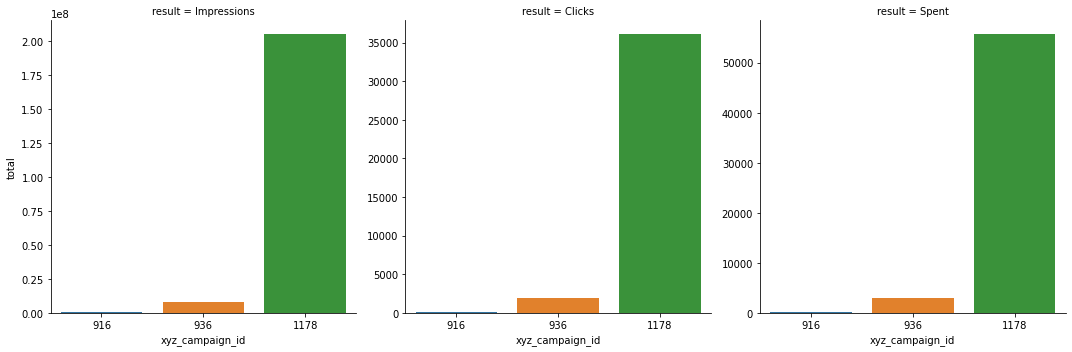

In [11]:
sns.catplot(x = 'xyz_campaign_id', y = 'total', col = 'result', data = melt, kind = 'bar', sharey = False)
plt.show()

### 3. What are Conversion Rates of Each Campaigns?

In this data, each ads have the following information related to conversion rate.

- Impressions: the number of times the ad was shown.
- Total_Conversions: the number of people who enquired about the product after seeing the ad
- Approved_Conversions: the number of people who bought the product after seeing the ad

Therefore, I will calculate two conversion rates by dividing total number of conversion by total number of impression.


In [12]:
# Conversion rate 1
# number of product enquiries / number of ad impression
enquiry_conv = marketing['Total_Conversion'].sum()/ marketing['Impressions'].sum()

# Conversion rate 2
# number of product purchase / number of ad impression
purchase_conv = marketing['Approved_Conversion'].sum()/ marketing['Impressions'].sum()

print(f'Conversion Rate (Enquiry): {enquiry_conv *100 : .4f} %')
print(f'Conversion Rate (Purchase): {purchase_conv *100 : .4f} %')

Conversion Rate (Enquiry):  0.0015 %
Conversion Rate (Purchase):  0.0005 %


In [13]:
# aggregate impressions and conversion by campaign id
conv_by_cam = marketing.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 'Total_Conversion':'sum', 'Approved_Conversion':'sum'})
conv_by_cam

,Impressions,Total_Conversion,Approved_Conversion
xyz_campaign_id,,,
916,482925,58,24
936,8128187,537,183
1178,204823716,2669,872


In [14]:
conv_by_cam.reset_index(inplace = True)

In [15]:
conv_by_cam['conversion_rate_en'], conv_by_cam['conversion_rate_pur'] = conv_by_cam['Total_Conversion'] /  conv_by_cam['Impressions'] * 100, \
                                                                        conv_by_cam['Approved_Conversion'] /  conv_by_cam['Impressions'] *100
conv_by_cam

,xyz_campaign_id,Impressions,Total_Conversion,Approved_Conversion,conversion_rate_en,conversion_rate_pur
0,916,482925,58,24,0.012010,0.004970
1,936,8128187,537,183,0.006607,0.002251
2,1178,204823716,2669,872,0.001303,0.000426


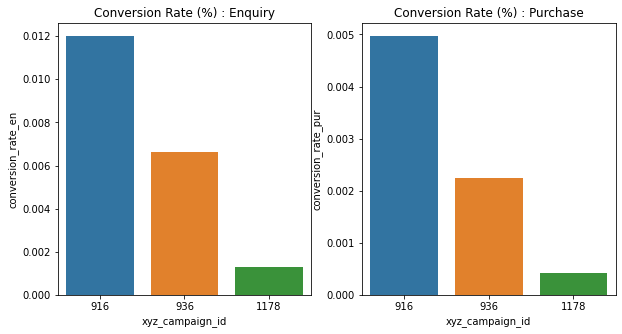

In [16]:

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (10, 5))
sns.barplot(x = 'xyz_campaign_id', y = 'conversion_rate_en', data = conv_by_cam, ax= ax[0])
sns.barplot(x = 'xyz_campaign_id', y = 'conversion_rate_pur', data = conv_by_cam, ax= ax[1])
ax[0].set_title('Conversion Rate (%) : Enquiry')
ax[1].set_title('Conversion Rate (%) : Purchase')
plt.show()

#### - The campaign, 916 showed the highest conversion, 936 the second, and 1178 the least in both conversion rates (enquiry-based and purchase-based).

### 4. Customer Segmentation

Let's break down conversion rate by customer groups.

#### 1) By Age Group

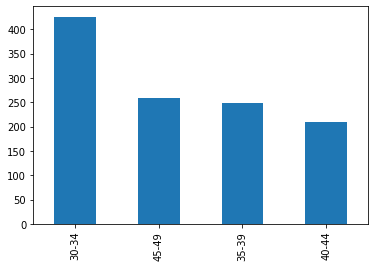

In [17]:
marketing['age'].value_counts().plot(kind = 'bar')
plt.show()

#### The dataset comprised the most ads targeted audience aged 30 to 34.

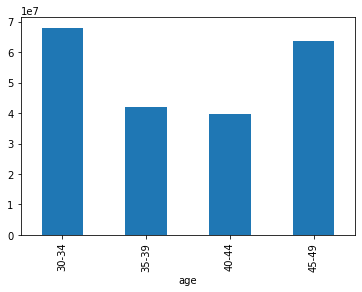

In [18]:
imp_by_age = marketing.groupby('age')['Impressions'].sum()
imp_by_age.plot(kind = 'bar')
plt.show()

#### - As for the number of impression, one for age group 30 to 34 was the highest.
#### - The impressions for the audience aged 45 to 49 was almost as high as one for 30 to 34 although the number of ads run was much lower.

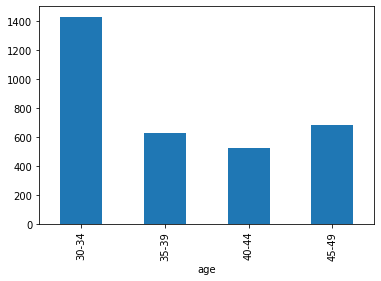

In [19]:
enquiry_by_age = marketing.groupby('age')['Total_Conversion'].sum()
enquiry_by_age.plot(kind = 'bar')
plt.show()

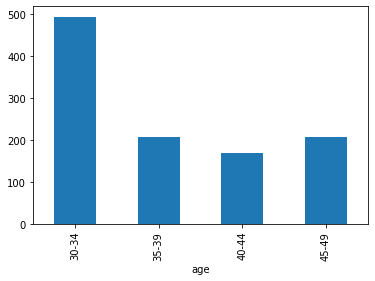

In [20]:
purchase_by_age = marketing.groupby('age')['Approved_Conversion'].sum()
purchase_by_age.plot(kind = 'bar')
plt.show()

#### - As you can see above, the ads impression to the age group 45 to 49 was the second highest 
#### - The ads impression to the age group 45 to 49 was much higher than the group 35 to 39 and 40 to 44. 
#### - However, that didn't make impact on conversion.
#### - From dataset, the cause of high impression of ads on age group 45 to 49 isn't clear.
#### = Possibly, it could be that more budget was given on the ads targeting the age group 44 to 49 or some keywords in the ads might have triggered the ads to be shown more to them.
#### - Nonetheless, the ads targed the age group 45 to 49 didn't make good performance.

In [21]:
conv_rate = round(enquiry_by_age / imp_by_age *100, 4)

In [22]:
conv_rate

age
30-34    0.0021
35-39    0.0015
40-44    0.0013
45-49    0.0011
dtype: float64

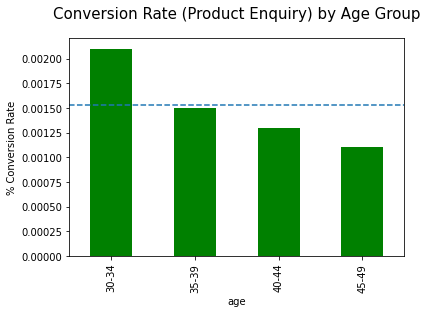

In [23]:
conv_rate.plot(kind = 'bar', color = 'g')
plt.axhline(y = enquiry_conv * 100, linestyle = '--')
plt.title('Conversion Rate (Product Enquiry) by Age Group', fontsize = 15, pad = 20)
plt.ylabel('% Conversion Rate')
plt.show()

#### Product-Enquiry Based Conversion Rate
#### - The conversion rate, 0.002% in the age group between 30 to 34 was the highest.
#### - It was higher than the average conversion rate, 0.0015%.

In [24]:
conv_rate_pur = purchase_by_age / imp_by_age *100

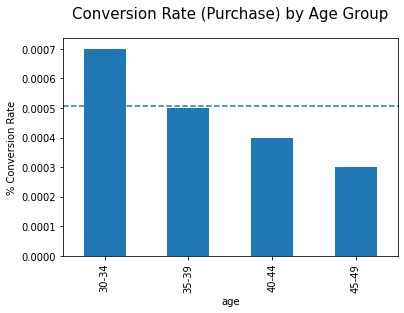

In [25]:
round(conv_rate_pur, 4).plot(kind = 'bar')
plt.axhline(y = purchase_conv * 100, linestyle = '--')
plt.title('Conversion Rate (Purchase) by Age Group', fontsize = 15, pad = 20)
plt.ylabel('% Conversion Rate')
plt.show()

#### Purchase Based Conversion Rate
#### - The conversion rate, 0.0007% in the age group between 30 to 34 was the highest.
#### - It was higher than the average conversion rate, 0.0005%.

#### 2) By Gender

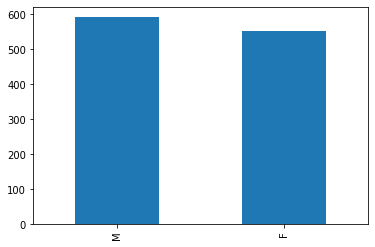

In [26]:
marketing['gender'].value_counts().plot(kind = 'bar')
plt.show()

#### Both genders have similar number of ads in this dataset.

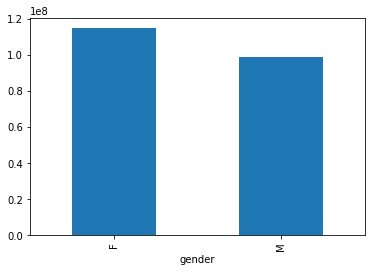

In [27]:
imp_by_gender = marketing.groupby('gender')['Impressions'].sum()
imp_by_gender.plot(kind = 'bar')
plt.show()

#### The ads were shown slightly more to female audience. 

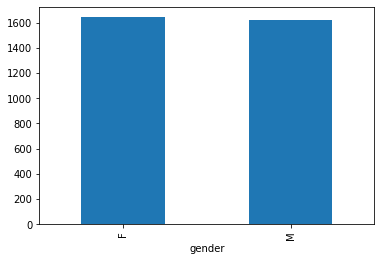

In [28]:
enquiry_by_gender = marketing.groupby('gender')['Total_Conversion'].sum()
enquiry_by_gender.plot(kind = 'bar')
plt.show()

#### As for the number of the product enquiries, both gender had almost the same.

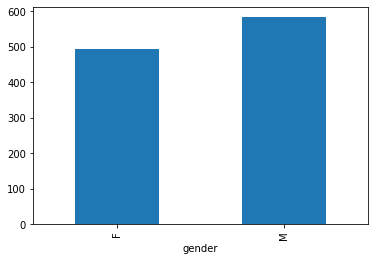

In [29]:
purchase_by_gender = marketing.groupby('gender')['Approved_Conversion'].sum()
purchase_by_gender.plot(kind = 'bar')
plt.show()

#### On the other hand, actual purchase done by male was higher than by female.

In [30]:
enquiry_by_gender / imp_by_gender * 100

gender
F    0.001431
M    0.001643
dtype: float64

In [31]:
purchase_by_gender / imp_by_gender * 100

gender
F    0.000431
M    0.000592
dtype: float64

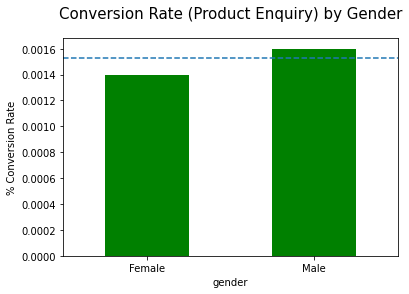

In [32]:
round(enquiry_by_gender / imp_by_gender * 100, 4).plot(kind = 'bar', color = 'g')
plt.axhline(y = enquiry_conv * 100, linestyle = '--')
plt.title('Conversion Rate (Product Enquiry) by Gender', fontsize = 15, pad = 20)
plt.xticks([0,1], ['Female', 'Male'], rotation = 0)
plt.ylabel('% Conversion Rate')
plt.show()

#### Product-Enquiry Based Conversion Rate
#### - The conversion rate, 0.0016% of male was the higher than female.
#### - It was slightly higher than the average conversion rate, 0.0015%.

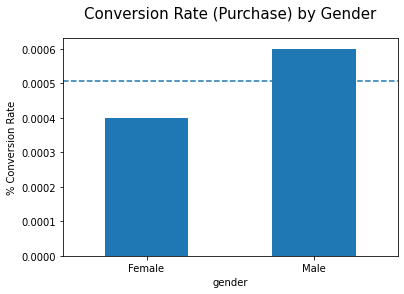

In [33]:
round(purchase_by_gender / imp_by_gender * 100, 4).plot(kind = 'bar')
plt.axhline(y = purchase_conv * 100, linestyle = '--')
plt.title('Conversion Rate (Purchase) by Gender', fontsize = 15, pad = 20)
plt.xticks([0,1], ['Female', 'Male'], rotation = 0)
plt.ylabel('% Conversion Rate')
plt.show()

#### Purchase Based Conversion Rate
#### - The conversion rate, 0.0006% of male was the higher than female.
#### - It was higher than the average conversion rate, 0.0005%.

### 4. Which Campaign occurred the most / least clicks per impression?

In [34]:
performance = marketing.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 
                                                        'Clicks': 'sum', 
                                                        'Spent': 'sum', 
                                                        'Total_Conversion': 'sum', 
                                                        'Approved_Conversion': 'sum'})

In [35]:
performance.reset_index(inplace = True)

In [36]:
performance

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,482925,113,149.710001,58,24
1,936,8128187,1984,2893.369999,537,183
2,1178,204823716,36068,55662.149959,2669,872


In [37]:
# add columns of online ads metrics

# CTR (Click Through Rate)
performance['ctr'] = performance['Clicks'] / performance['Impressions'] *100

# RPM (Revenue Per Mille) 
# Mille here indicates 1,000 impressions
performance['rpm']= performance['Spent'] / performance['Impressions'] /1000

# RPC (Revenue Per Click)
performance['rpc']= performance['Spent'] / performance['Clicks']

In [38]:
performance

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,rpm,rpc
0,916,482925,113,149.710001,58,24,0.023399,3.100067e-07,1.324867
1,936,8128187,1984,2893.369999,537,183,0.024409,3.559674e-07,1.458352
2,1178,204823716,36068,55662.149959,2669,872,0.017609,2.717564e-07,1.543256


#### - As for click-through rate, the ads campaign 936 was the highest.
#### - As for revenue per mille rate, the ads campaign 936 was also the highest.
#### - As for revenue per click rate, the ads campaign 1178 was the highest.

## Hypothesis Testing

### Through EDA, we've learned the following.

> #### 1) The age group 30 to 34 are most likely to be converted.
> #### 2) The male audience is more likely to be converted.
> #### 3) Ads Performance Metrics
>> * As for click-through rate, the ads campaign 936 was the highest.
>> * As for revenue per mille rate, the ads campaign 936 was also the highest.
>> * As for revenue per click rate, the ads campaign 1178 was the highest.



#### However, what if this is just random chance?
#### For that, let's run hypothesis testing.

### Two Sample T test
### 1) get t test statistics
#### The hypothesis test for determining if there is a difference between the means of two populations uses "t".
#### It can be calculated from three values from each sample using this equation.


$$t = \frac{\bar{x_{male}} - \bar{x_{female}}}{\sqrt{\frac{s_{male}^{2}}{n_{male}}+\frac{s_{female}^{2}}{n_{female}}}}$$

#### 2) calculate the p-value from the t test statistic using t-distribution

In [39]:
# define function to calculate p-value of two sample t test
def p_value_two_sample(df, group_by, group_list, target_col):
    
    target_by = marketing.groupby(group_by).agg({target_col:('mean', 'std', 'count')})
    
    # save mean value
    g1_mean = target_by.loc[group_list[0], target_col]['mean']
    g2_mean= target_by.loc[group_list[1], target_col]['mean']
    
    # save standard deviation value
    g1_std = target_by.loc[group_list[0], target_col]['std']
    g2_std = target_by.loc[group_list[1], target_col]['std']
    
    # save count value
    g1_count = target_by.loc[group_list[0], target_col]['count']
    g2_count= target_by.loc[group_list[1], target_col]['count']
    
    # obtain t test statistic
    numerator = g1_mean - g2_mean
    denominator = np.sqrt((g1_std **2 / g2_count) + (g2_std **2 / g2_count))
    t_test_statistic = numerator / denominator

    degrees_of_freedom = g1_count + g2_count - 2
    p_value = 1- t.cdf(t_test_statistic, df = degrees_of_freedom)
    
    return p_value

### Hypothesis Testing 1. The age group 30 to 34 are most likely to be converted.

* Null Hypothesis: There is no difference in conversion rate among the age group.
* Alternative Hypothesis: There is difference in conversion rate among the age group.

In [40]:
# add column for conversion rate of each row
marketing['total_conversion_rate'] = marketing['Total_Conversion'] / marketing['Impressions']
marketing['approved_conversion_rate'] = marketing['Approved_Conversion'] / marketing['Impressions']
marketing

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,total_conversion_rate,approved_conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000272,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.001443,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000012,0.000002
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000005,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000013,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000010,0.000003


In [41]:
pingouin.pairwise_tests(data = marketing, dv= 'total_conversion_rate', between = 'age', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,age,30-34,35-39,False,True,3.021575,671.908818,two-sided,0.002610,0.015661,bonf,7.52,0.210853
1,age,30-34,40-44,False,True,1.705631,382.751247,two-sided,0.088888,0.533329,bonf,0.387,0.148363
2,age,30-34,45-49,False,True,2.601723,668.806035,two-sided,0.009481,0.056886,bonf,2.373,0.188496
3,age,35-39,40-44,False,True,-0.352412,303.071246,two-sided,0.724774,1.000000,bonf,0.111,-0.034600
4,age,35-39,45-49,False,True,-0.238110,492.973590,two-sided,0.811895,1.000000,bonf,0.102,-0.021032
5,age,40-44,45-49,False,True,0.184158,340.129632,two-sided,0.854000,1.000000,bonf,0.105,0.017841


#### Check the column, 'p-corr'.
#### When we apply standard significance level, 0.05, the difference between age group 30 to 34 and 35 to 39 was statistically significant.

In [42]:
pingouin.pairwise_tests(data = marketing, dv= 'approved_conversion_rate', between = 'age', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,age,30-34,35-39,False,True,2.854662,543.434406,two-sided,0.004473,0.026837,bonf,4.681,0.181914
1,age,30-34,40-44,False,True,0.598696,346.160141,two-sided,0.549767,1.000000,bonf,0.112,0.054248
2,age,30-34,45-49,False,True,2.589635,611.167497,two-sided,0.009837,0.059020,bonf,2.302,0.170678
3,age,35-39,40-44,False,True,-1.018711,229.480714,two-sided,0.309413,1.000000,bonf,0.172,-0.102722
4,age,35-39,45-49,False,True,-0.230201,475.179288,two-sided,0.818034,1.000000,bonf,0.101,-0.020292
5,age,40-44,45-49,False,True,0.920386,244.819275,two-sided,0.358277,1.000000,bonf,0.155,0.092894


In [43]:
print('P value (Total conversion rate)\n')
for b in ['35-39', '40-44', '45-49']:
    p = p_value_two_sample(marketing, 'age', ['30-34', b], 'total_conversion_rate')
    
    print(f'age group 30-34 > {b}: {p}')
    
    if p < 0.05:
        print('Very Likely\n')
    else:
        print('Very Unlikely\n')

P value (Total conversion rate)

age group 30-34 > 35-39: 0.006285566730726
Very Likely

age group 30-34 > 40-44: 0.0674152368313301
Very Unlikely

age group 30-34 > 45-49: 0.01288612742426365
Very Likely



In [44]:
print('P value (Approved conversion rate)\n')
for b in ['35-39', '40-44', '45-49']:
    p = p_value_two_sample(marketing, 'age', ['30-34', b], 'approved_conversion_rate')
    print(f'approved conversion rate 30-34 > {b}: {p}')
    
    if p < 0.05:
        print('Very Likely\n')
    else:
        print('Very Unlikely\n')

P value (Approved conversion rate)

approved conversion rate 30-34 > 35-39: 0.012666811376693454
Very Likely

approved conversion rate 30-34 > 40-44: 0.29614504698899946
Very Unlikely

approved conversion rate 30-34 > 45-49: 0.017674069287912264
Very Likely



### Hypothesis Testing 2. The male audience is most likely to be converted.

* Null Hypothesis: The conversion rate of male audience is the same as that of female.
* Alternative Hypothesis: The conversion rate of male audience is higher than that of female.

In [45]:
print('Total conversion rate Male > Female')
p = p_value_two_sample(marketing, 'gender', ['M', 'F'], 'total_conversion_rate')
if p < 0.05:
    print('Very Likely\n')
else:
    print('Very Unlikely\n')

Total conversion rate Male > Female
Very Unlikely



In [46]:
print('Approved conversion rate Male > Female')
p = p_value_two_sample(marketing, 'gender', ['M', 'F'], 'approved_conversion_rate')
if p < 0.05:
    print('Very Likely\n')
else:
    print('Very Unlikely\n')

Approved conversion rate Male > Female
Very Unlikely



#### P value is higher than significance level, 0.05, so the testing failed to reject null hypothesis.
#### It apprears the conversion rate of male audience isn't different from that of female.

### Hypothesis Testing 3. Ads Performance Metrics

We will test the followings.
* As for click-through rate, the ads campaign 936 was the highest.
* As for revenue per mille rate, the ads campaign 936 was also the highest.
* As for revenue per click rate, the ads campaign 1178 was the highest.

In [47]:
# add columns of online ads metrics

# CTR (Click Through Rate)
marketing['ctr'] = marketing['Clicks'] / marketing['Impressions'] 

# RPM (Revenue Per Mille) 
# Mille here indicates 1,000 impressions
marketing['rpm']= marketing['Spent'] / marketing['Impressions'] /1000 

# RPC (Revenue Per Click)
marketing['rpc']= marketing['Spent'] / marketing['Clicks'] 

In [48]:
pingouin.pairwise_tests(data = marketing, dv= 'ctr', between = 'xyz_campaign_id', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,xyz_campaign_id,916,936,False,True,0.665441,65.735079,two-sided,0.508096,1.0,bonf,0.192,0.096154
1,xyz_campaign_id,916,1178,False,True,0.827309,54.390038,two-sided,0.411677,1.0,bonf,0.212,0.242782
2,xyz_campaign_id,936,1178,False,True,0.364482,568.941005,two-sided,0.715634,1.0,bonf,0.073,0.024892


#### It appears that the difference among three campaigns's click-through rate isn't statistically significant.

In [49]:
pingouin.pairwise_tests(data = marketing, dv= 'rpm', between = 'xyz_campaign_id', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,xyz_campaign_id,916,936,False,True,0.523736,65.787691,two-sided,0.602222,1.000000,bonf,0.178,0.075560
1,xyz_campaign_id,916,1178,False,True,-0.322435,54.351497,two-sided,0.748361,1.000000,bonf,0.162,-0.095451
2,xyz_campaign_id,936,1178,False,True,-2.456080,565.628679,two-sided,0.014346,0.043037,bonf,1.335,-0.167919


#### It appears that the difference in revenue per 1000 impressions between campaign 936 and 1178 is statistically significant.

#### Through two sample t-test, let's see if that hold true and which ad campaign outperformed in RPM.

In [50]:
print('Revenue Per 1,000 impressions: campaign ID 936 > 1178')
p = p_value_two_sample(marketing, 'xyz_campaign_id', [936, 1178], 'rpm')
if p < 0.05:
    print('Very Likely\n')
else:
    print('Very Unlikely\n')

Revenue Per 1,000 impressions: campaign ID 936 > 1178
Very Unlikely



In [51]:
print('Revenue Per 1,000 impressions: campaign ID 1178 > 936')
p = p_value_two_sample(marketing, 'xyz_campaign_id', [1178, 936], 'rpm')
if p < 0.05:
    print('Very Likely\n')
else:
    print('Very Unlikely\n')

Revenue Per 1,000 impressions: campaign ID 1178 > 936
Very Likely



#### P value of the t test is below signifance level(0.05). 
#### Therefore, it is very likely that the campaign 1178 outperformed the campaign 936 in RPM.

In [52]:
pingouin.pairwise_tests(data = marketing, dv= 'rpc', between = 'xyz_campaign_id', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,xyz_campaign_id,916,936,False,True,-0.799053,46.620662,two-sided,4.283120e-01,1.000000e+00,bonf,0.255,-0.124276
1,xyz_campaign_id,916,1178,False,True,-6.099463,36.099998,two-sided,5.064027e-07,1.519208e-06,bonf,4.592e+06,-1.399660
2,xyz_campaign_id,936,1178,False,True,-11.806778,391.190244,two-sided,1.003456e-27,3.010368e-27,bonf,4.975e+26,-0.994823


#### It appears that the difference in revenue per click between campaign 1178 and the others is statistically significant.

In [53]:
print('Revenue Per clicks\n')
for b in [916, 936]:
    p = p_value_two_sample(marketing, 'xyz_campaign_id', [1178, b], 'rpc')
    print(f'RPC 1178 > {b}: {p}')
    if p < 0.05:
        print('Very Likely\n')
    else:
        print('Very Unlikely\n')

Revenue Per clicks

RPC 1178 > 916: 3.691177300479964e-07
Very Likely

RPC 1178 > 936: 0.0
Very Likely



## Conclusion

> #### 1) The age group 30 to 34 are more likely to be converted than the age group 35 to 39 and the age group 45 to 49; about the same as 40 to 44.
> #### 2) The conversion rates for male and female audience are likely to be the same.
> #### 3) Ads Performance Metrics
>> * As for click-through rate, all three campaigns are likely to have the same.
>> * As for revenue per 1,000 impressions rate, the ads campaign 1178 is likely to be the highest.
>> * As for revenue per click rate, the ads campaign 1178 is likely to be the highest.


### The Best Target Audience: the age froup 30-35, 40-44
### The Most Revenue Generating Ads: the campaign 1178